# Descriptive Statistics
by Engr. Jonathan V. Taylar
<hr>


**Descriptive statistics** applies the concepts, measures, and terms that are used to describe the basic features of the samples in a study. These procedures are essential to provide summaries about the samples as an approximation of the population. Together with simple graphics, they form the basis of every quantitative analysis of
data. In order to describe the sample data and to be able to infer any conclusion, we should go through several steps:

1. **Data preparation**: Given a specific example, we need to prepare the data for generating statistically valid descriptions.
2. **Descriptive statistics**: This generates different statistics to describe and summarize the data concisely and evaluate different ways to visualize them. 

<hr>



## Data Preparation
<hr>
One of the first tasks when analyzing data is to collect and prepare the data in a format appropriate for analysis of the samples. The most common steps for data preparation involve the following operations.

1. **Obtaining the data**: Data can be read directly from a file or they might be obtained by scraping the web.
2. **Parsing the data**: The right parsing procedure depends on what format the data are in: plain text, fixed columns, CSV, XML, HTML, etc.
3. **Cleaning the data**: Survey responses and other data files are almost always incomplete. Sometimes, there are multiple codes for things such as, not asked, did not know, and declined to answer. And there are almost always errors. A simple strategy is to remove or ignore incomplete records.
4. **Building data structures**: Once you read the data, it is necessary to store them in a data structure that lends itself to the analysis we are interested in. If the data fit into the memory, building a data structure is usually the way to go. If not, usually a database is built, which is an out-of-memory data structure. Most databases provide a mapping from keys to values, so they serve as dictionaries.


# Real World Example
Let us consider a public database called the “Adult” dataset, hosted on the UCI’s Machine Learning Repository - https://archive.ics.uci.edu/ml/machine-learning-databases/adult/. It contains approximately 32,000 observations concerning different financial parameters related to the US population: age, sex, marital
(marital status of the individual), country, income (Boolean variable: whether the person makes more than $50,000 per annum), education (the highest level of education achieved by the individual), occupation, capital gain, etc.

We will show that we can explore the data by asking questions like: “Are men more likely to become high-income professionals than women, i.e., to receive an income of over $50,000 per annum?”



In [1]:
# Let's read the data

file = open('adult.data','r') # r is an attribute - w -> to write
def chr_int(a): #
    if a.isdigit(): return int(a)
    else : return 0

data = []

for line in file :
    data1 = line.split(', ') # , split the line into two
    if len(data1) == 15:
        data.append([ chr_int(data1 [0]), data1[1],
            chr_int(data1 [2]), data1[3],
            chr_int(data1 [4]), data1[5],
            data1[6], data1[7], data1[8],
            data1[9], chr_int (data1[10]),
            chr_int(data1[11]),
            chr_int(data1[12]),
            data1 [13], data1[14]
            ])

In [3]:
# Let's check the data

print(data[1:2]) #output the first and second index

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [3]:
# Let's convert the data into DataFrame
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame( data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n


In [4]:
df.columns = [ #define column names
'age', 'type_employer', 'fnlwgt',
'education', 'education_num', 'marital',
'occupation', 'relationship', 'race',
'sex', 'capital_gain', 'capital_loss',
'hr_per_week', 'country', 'income']
df

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n


The command ```shape``` gives exactly the number of data samples (in rows, in this case) and features (in columns):

In [5]:
df.shape

(32561, 15)

Thus, we can see that our dataset contains 32,561 data records with 15 features each. Let us count the number of items per country.

In [6]:
counts = df.groupby('country').size()
print(counts.head()) #print(counts) - para mapakita lahat ng rows

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


The first row shows the number of samples with unknown country, followed by the number of samples corresponding to the first countries in the dataset.

Let us split people according to their gender into two groups: men and women.

In [7]:
ml = df[(df.sex == 'Male') ]
ml

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K\n
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K\n
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n


If we focus on high-income professionals separated by sex, we can do:

In [8]:
ml1 = df[(df.sex == 'Male') & (df.income== '>50K\n')]
fm = df[(df.sex == 'Female') ]
fm1 = df[(df.sex == 'Female') & (df.income== '>50K\n') ]

In [13]:
ml1 #fm1 - for female

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K\n
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K\n
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K\n
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K\n
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K\n
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K\n
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K\n


# Summarizing the Data
<hr>
The data in general can be categorical or quantitative. For categorical data, a simple tabulation of the frequency of each category is the best non-graphical exploration
for data analysis. For example, we can ask ourselves what is the proportion of high income professionals in our database:


In [9]:
df1 = df[(df.income== '>50K\n') ]
print('The rate of people with high income is: ',
int( len(df1)/ float ( len(df))*100), '%.')
print ('The rate of men with high income is: ',
int( len(ml1)/ float ( len(ml))*100), '%.')
print ('The rate of women with high income is: ',
int( len(fm1)/ float ( len(fm))*100), '%.')

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


Given a quantitative variable, exploratory data analysis is a way to make preliminary assessments about the population distribution of the variable using the data of the observed samples. The characteristics of the population distribution of a quantitative variable are its *mean, deviation, histograms, outliers, etc*. 

Our observed data represent just a finite set of samples of an often infinite number of possible samples. The characteristics of our randomly observed samples are interesting only to the degree that they represent the population of the data they came from.

# Mean
<hr>

The terms mean and average are often used interchangeably. In fact, the main distinction between them is that the mean of a sample is the summary statistic, while an average is not strictly defined and could be one of many summary statistics that can be chosen to describe the central tendency of a sample.


In [10]:
print('The average age of men is: ',ml['age'].mean())
print('The average age of women is: ',fm['age'].mean())
print('The average age of high - income men is: ',ml1['age'].mean())
print('The average age of high - income women is: ',fm1['age'].mean())

The average age of men is:  39.43354749885268
The average age of women is:  36.85823043357163
The average age of high - income men is:  44.62578805163614
The average age of high - income women is:  42.125530110262936


# Sample Variance
<hr>

The mean is not usually a sufficient descriptor of the data. We can go further by knowing two numbers: mean and variance. 

The variance $σ^2$ describes the spread of the data and it is defined as follows:

$σ^2$ = $\frac{1}{n}$ $\sum_{i}$ $(xi − μ)^2$

The term $(xi − μ)^2$ is called the deviation from the mean, so the variance is the mean squared deviation. The square root of the variance, $σ$, is called the standard deviation.

We consider the standard deviation, because the variance is hard to interpret (e.g., if the units are grams, the variance is in grams squared).

Let us compute the mean and the variance of hours per week men and women in our dataset work. 



In [11]:
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()
print('Statistics of age for men: mu:', ml_mu , 'var:', ml_var, \
       'std:', ml_std)
print('Statistics of age for women: mu:', fm_mu , 'var:', fm_var, \
      'std:', fm_std)

Statistics of age for men: mu: 39.43354749885268 var: 178.77375174530096 std: 13.37063019252649
Statistics of age for women: mu: 36.85823043357163 var: 196.3837063948037 std: 14.01369709943824


We can see that the mean number of hours worked per week by women is significantly lesser than that worked by men, but with much higher variance and standard
deviation.


# Sample Median
<hr>

What will happen if in the sample set there is an error with a value very different from the rest? An item of data that is significantly different from the rest of the data is called an **outlier**. In this case, the mean, μ, will be drastically changed towards the outlier.

One solution to this drawback is offered by the statistical median, which is an order statistic giving the middle value of a sample. In this case, all the values are ordered by their magnitude and the median is defined as the value that is in the middle of the ordered list. 

Let us see, the median age of working men and women in our dataset and the median age of high-income men and women:





In [12]:
ml_median = ml['age'].median()
fm_median = fm['age'].median()
print('Median age per men and women: ', ml_median , fm_median) 
ml_median_age = ml1['age'].median()
fm_median_age = fm1['age'].median()
print('Median age per men and women with high - income: ', \
      ml_median_age , fm_median_age) 

Median age per men and women:  38.0 35.0
Median age per men and women with high - income:  44.0 41.0


As expected, the median age of high-income people is higher than the whole set of working people, although the difference between men and women in both sets is the same.

# Data Distributions
<hr>

Summarizing data by just looking at their mean, median, and variance can be dangerous: very different data can be described by the same statistics. The best thing to do is to validate the data by inspecting them. We can have a look at the data distribution,
which describes how often each value appears (i.e., what is its frequency).

The most common representation of a distribution is a histogram, which is a graph that shows the frequency of each value. Let us show the age of working men and women separately.


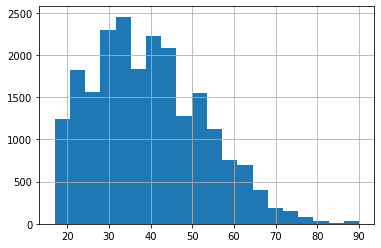

In [13]:
ml_age = ml['age']
ml_age.hist(histtype = 'stepfilled', bins = 20)

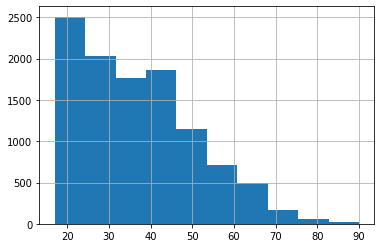

In [14]:
fm_age = fm['age']
fm_age.hist(histtype = 'stepfilled', bins = 10)

In [32]:
!pip install seaborn

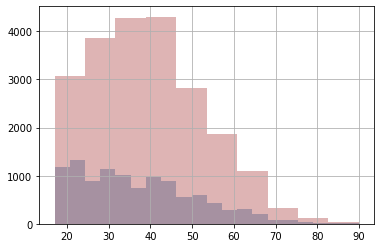

In [15]:
import seaborn as sns
fm_age = fm['age']
ml_age = ml['age']
fm_age.hist(histtype = 'stepfilled', alpha = .5, bins = 20)
ml_age.hist(histtype = 'stepfilled', alpha = .5, 
            color = sns.desaturate("indianred", .75), bins = 10)

# Outlier Treatment
<hr>

As mentioned before, **outliers** are data samples with a value that is far from the central tendency. Different rules can be defined to detect outliers, as follows:
- Computing samples that are far from the median.
- Computing samples whose values exceed the mean by 2 or 3 standard deviations.

For example, in our case, we are interested in the age statistics of men versus women with high incomes and we can see that in our dataset, the minimum age is 17 years and the maximum is 90 years. We can consider that some of these samples are due to errors or are not representable. 

Applying the domain knowledge, we focus on the median age (37, in our case) up to 72 and down to 22 years old, and we consider the rest as outliers.


In [16]:
df2 = df.drop(df.index[(df.income == '>50K\n') & #drop columns na more than 50k ang income
(df['age'] > df['age'].median() + 35) &
(df['age'] > df['age'].median() -15)])

ml1_age = ml1['age']
fm1_age = fm1['age']

ml2_age = ml1_age. drop( ml1_age.index[
(ml1_age > df['age'].median() + 35) &
(ml1_age > df['age'].median() - 15)])

fm2_age = fm1_age. drop( fm1_age.index[
(fm1_age > df['age'].median() + 35) &
(fm1_age > df['age'].median() - 15)])


We can check how the mean and the median changed once the data were cleaned:

In [17]:
mu2ml = ml2_age .mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()

mu2fm = fm2_age .mean()
std2fm = fm2_age.std()
md2fm = fm2_age.median()

print('Men statistics:')
print('Mean:', mu2ml , 'Std:', std2ml)
print('Median:', md2ml)
print('Min:', ml2_age.min(), 'Max:', ml2_age.max())
print('Women statistics:')
print('Mean:', mu2fm , 'Std:', std2fm)
print('Median:', md2fm)
print('Min:', fm2_age.min(), 'Max:', fm2_age.max())

Men statistics:
Mean: 44.317982123920615 Std: 10.019749857171412
Median: 44.0
Min: 19 Max: 72
Women statistics:
Mean: 41.877028181041844 Std: 10.036441807343714
Median: 41.0
Min: 19 Max: 72


In [45]:
!pip install matplotlib

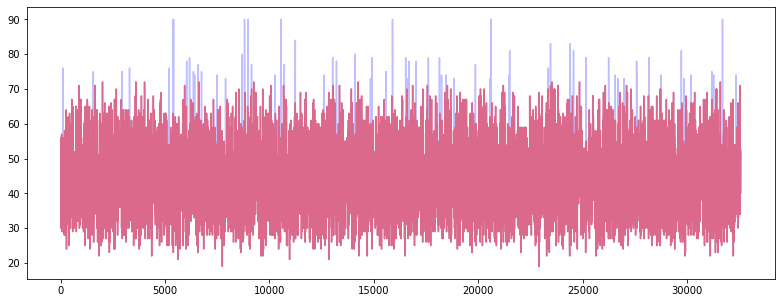

In [18]:
#import matplotlib.pyplot as plt

plt.figure(figsize = (13.4, 5))
df.age[(df.income == '>50K\n') ].plot(alpha = .25, color = 'blue')
df2.age[(df2.income == '>50K\n') ].plot(alpha = .45, color = 'red')


In [19]:
print('The mean difference with outliers is: %4.2f' 
      % (ml_age.mean() - fm_age.mean()))
print('The mean difference without outliers is: %4.2f' 
      % (ml2_age. mean() - fm2_age. mean()))


The mean difference with outliers is: 2.58
The mean difference without outliers is: 2.44


# Sample and Estimated Mean,Variance and Standard Scores
<hr>
In continuation, we will deal with point estimators that are single numerical estimates of parameters of a population.



# Mean
Let us assume that we know that our data are coming from a normal distribution and the random samples drawn are as follows:
```{0.33, −1.76, 2.34, 0.56, 0.89}```.

The question is can we guess the mean μ of the distribution? One approximation is given by the sample mean, x¯. This process is called **estimation** and the statistic (e.g., the sample mean) is called an **estimator**.

In our case, the sample mean is 0.472, and it
seems a logical choice to represent the mean of the distribution. It is not so evident if we add a sample with a value of −465. In this case, the sample mean will be −77.11, which does not look like the mean of the distribution. 

The reason is due to the fact that the last value seems to be an outlier compared to the rest of the sample. In order to avoid this effect, we can try first to remove outliers and then to estimate the mean; or we can use the sample median as an estimator of the mean of the distribution.

If there are no outliers, the sample mean x¯ minimizes the following mean squared error:

$MSE$ = $\frac{1}{n}$ $\sum_{}$ $(x¯ − μ)^2$

where $n$ is the number of times we estimate the mean.
Let us compute the MSE of a set of random data:

In [92]:
import numpy as np

NTs = 200
mu = 0.0
var = 1.0
err = 0.0
NPs = 1000
for i in range (NTs):
    x = np.random.normal(mu , var , NPs)
    err += (x.mean()-mu)**2
print('MSE: ', err/NTs)

MSE:  0.0008866147710785787


# Conclusions
In this chapter, we have familiarized ourselves with the basic concepts and procedures
of descriptive statistics to explore a dataset. As we have seen, it helps us to understand
the experiment or a dataset in detail and allows us to put the data in perspective. We
introduced the central measures of tendency such as the sample mean and median;
and measures of variability such as the variance and standard deviation. We have also
discussed how these measures can be affected by outliers. In order to go deeper into
visualizing the dataset, we have introduced histograms, quantiles, and percentiles.